# EXPLORATION_15 OCR을 사용해서 영화 포스터 및 표지판 읽어보기

## 프로젝트 순서

### 1. 검증용 데이터셋 준비
### 2. karas-ocr / Tesseract로 테스트 진행
### 3. 테스트 결과 정리
### 4. 테스트 결과 분석
### 5. 회고

### 1. 검증용 데이터셋 준비

In [1]:
# 프로젝트에 필요한 라이브러리 import

import keras_ocr
import pytesseract
import os
import matplotlib.pyplot as plt

print(keras_ocr.__version__)
print(pytesseract.__version__)

0.8.8
0.3.8


In [2]:
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/sample'
sample = os.listdir(img_dir)
sample

['road_1.jpeg',
 'no_time_to_die.jpeg',
 'road_3.jpeg',
 'skyfall.jpg',
 '.ipynb_checkpoints',
 'road_2.jpeg',
 'lala_land.jpeg']

In [3]:
# 사용할 이미지 경로 지정

path_1 = os.getenv('HOME')+'/aiffel/ocr_python/sample/no_time_to_die.jpeg'
path_2 = os.getenv('HOME')+'/aiffel/ocr_python/sample/skyfall.jpg'
path_3 = os.getenv('HOME')+'/aiffel/ocr_python/sample/lala_land.jpeg'
path_4 = os.getenv('HOME')+'/aiffel/ocr_python/sample/road_1.jpeg'
path_5 = os.getenv('HOME')+'/aiffel/ocr_python/sample/road_2.jpeg'
path_6 = os.getenv('HOME')+'/aiffel/ocr_python/sample/road_3.jpeg'

### 2. 테스트 진행 / karas-ocr

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [5]:
# 첫번째 포스터 인식

images_1 = keras_ocr.tools.read(path_1)
prediction_groups_1 = pipeline.recognize([path_1])

In [6]:
# 두번째 포스터 인식

images_2 = keras_ocr.tools.read(path_2)
prediction_groups_2 = pipeline.recognize([path_2])

In [7]:
# 세번째 포스터 인식

images_3 = keras_ocr.tools.read(path_3)
prediction_groups_3 = pipeline.recognize([path_3])

In [8]:
# 첫번째 표지판 인식

images_4 = keras_ocr.tools.read(path_4)
prediction_groups_4 = pipeline.recognize([path_4])

In [9]:
# 두번째 표지판 인식

images_5 = keras_ocr.tools.read(path_5)
prediction_groups_5 = pipeline.recognize([path_5])

In [10]:
# 세번째 표지판 인식

images_6 = keras_ocr.tools.read(path_6)
prediction_groups_6 = pipeline.recognize([path_6])

### 3. 테스트 결과 확인 및 정리 / karas-ocr

<AxesSubplot:>

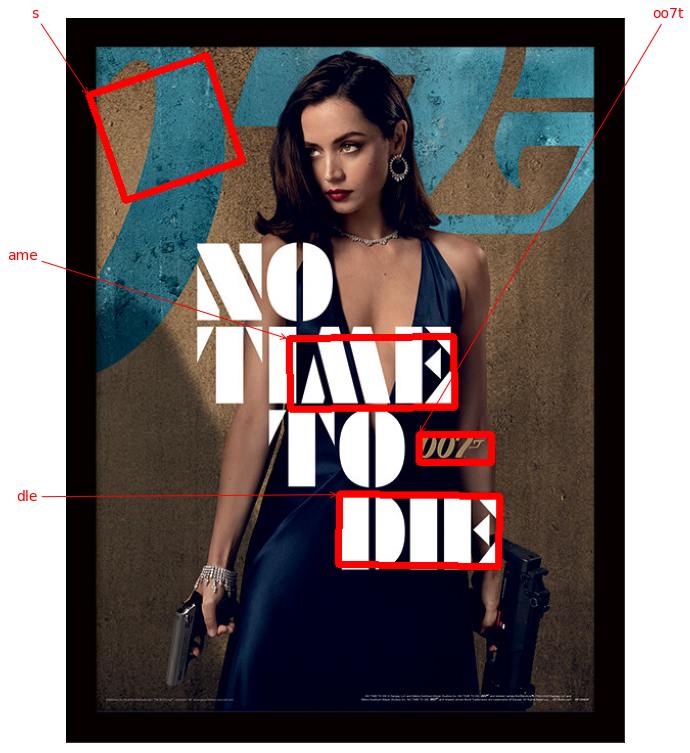

In [16]:
# Plot the predictions
f, ax = plt.subplots(nrows=1, figsize=(10, 20))
keras_ocr.tools.drawAnnotations(image=images_1, 
                                predictions=prediction_groups_1[0], ax=ax)

<AxesSubplot:>

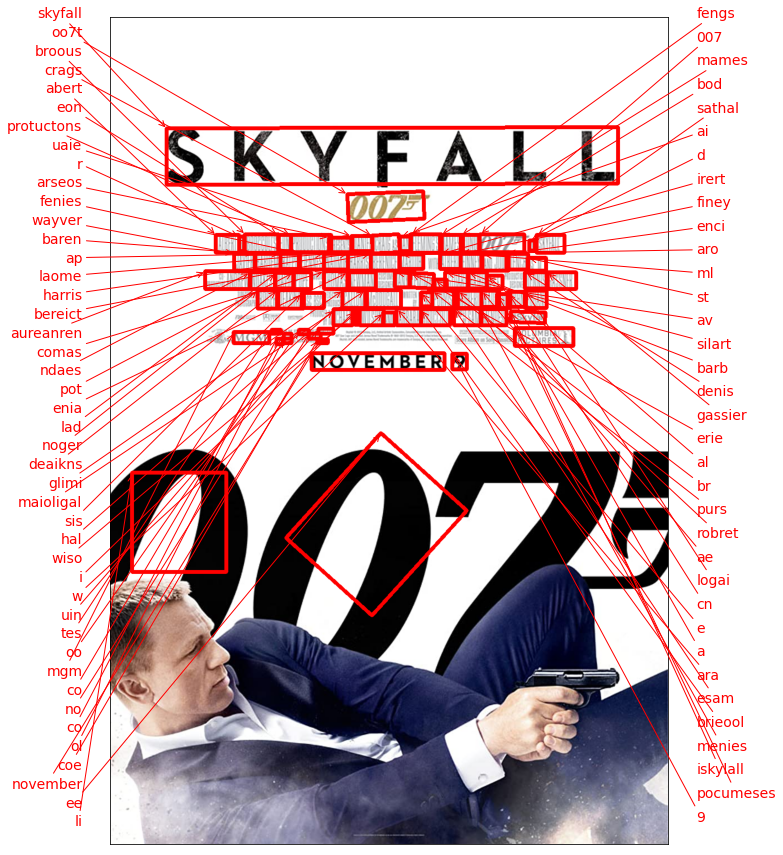

In [17]:
f, ax = plt.subplots(nrows=1, figsize=(10, 20))
keras_ocr.tools.drawAnnotations(image=images_2, 
                                predictions=prediction_groups_2[0], ax=ax)

<AxesSubplot:>

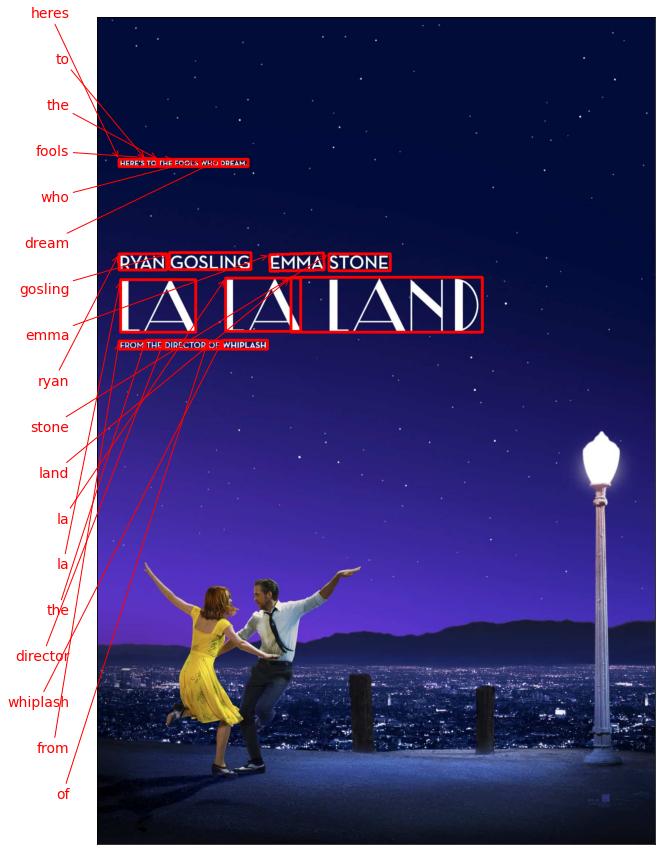

In [18]:
f, ax = plt.subplots(nrows=1, figsize=(10, 20))
keras_ocr.tools.drawAnnotations(image=images_3, 
                                predictions=prediction_groups_3[0], ax=ax)

<AxesSubplot:>

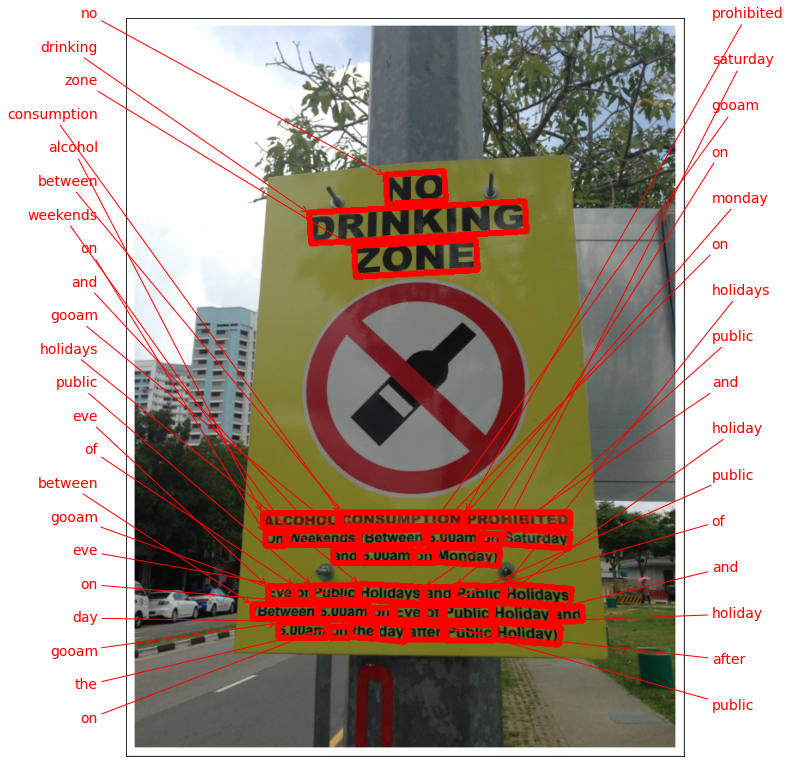

In [19]:
f, ax = plt.subplots(nrows=1, figsize=(10, 20))
keras_ocr.tools.drawAnnotations(image=images_4, 
                                predictions=prediction_groups_4[0], ax=ax)

<AxesSubplot:>

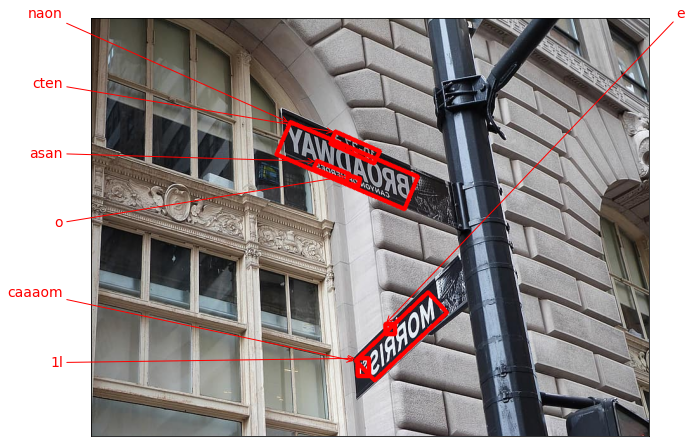

In [20]:
f, ax = plt.subplots(nrows=1, figsize=(10, 20))
keras_ocr.tools.drawAnnotations(image=images_5, 
                                predictions=prediction_groups_5[0], ax=ax)

<AxesSubplot:>

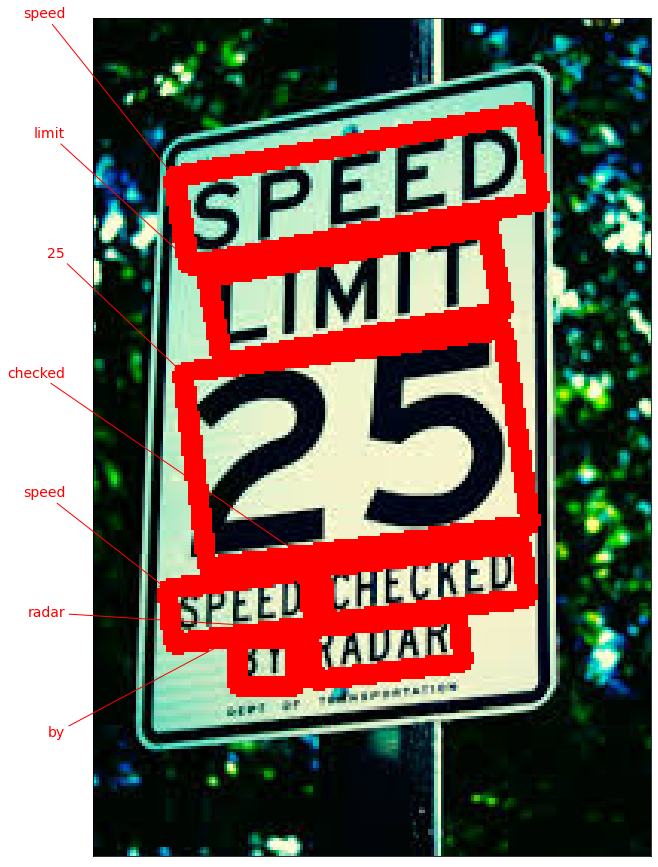

In [21]:
f, ax = plt.subplots(nrows=1, figsize=(10, 20))
keras_ocr.tools.drawAnnotations(image=images_6, 
                                predictions=prediction_groups_6[0], ax=ax)

### 4. 테스트 결과 분석 / karas-ocr

1. 첫번째 사진(no time to die 포스터)
  - 첫번째 문제는 글자 인식에 있어서 실패했다고 생각한다.
  - 인식에 실패한 이유로 예측되는 것은 일반적인 글자 모습이 아닌 그림을 합쳐놓아서 글자로 만든 모습의 형태이기 때문에 인식하지 못한 것 같다.
  - 두번째 문제는 글자가 아닌 외부 부분을 글자로 인식한 것이다.
  - 바탕에 문양이 있는데 그 문양이 글자와 비슷한 경우 글자로 인식하는 것 같다.


2. 두번째 사진(skyfall 포스터)
  - 글자 인식에 있어서는 일단 성공적인 것 같다.
  - 포스터가 credit까지 함께 들어있어서 매우 조잡하게 인식이 된 것 같다.
  - 일단 눈으로 확인 가능한 큰 글자들에 있어서는 인식이 잘 된것 같지만 credit같이 매우 작은 글자들은 정확하게 인식하지 못한것 같다.(사실 사람 눈으로도 확인이 잘 안된다.)


3. 세번째 사진(lala land 포스터)
  - 라라랜드 포스터에 있어서는 포스터가 단조롭고 글자가 커서 인식이 잘 된것 같다.
  - 여기서는 신기하게도 큰 제목 밑에 있는 작은 설명이 인식이 잘 되었다는 점이다.
  - 그 전 포스터들에서는 작은 글자는 잘 인식되지 않았는데 라라랜드 포스터는 작은글자가 명확하게 적혀져 있어서 그런지 잘 인식하였다.


4. 네번째, 다섯번째, 여섯번째 사진(길거리 표지판)
  - 길거리 표지판의 경우 보통 글자가 명확하고 크게 적혀있어서 잘 인식이 된 것 같다.
  - 한가지 문제점이라면 표지판의 경우 보는 각도에 따라서 글자가 반대로 보이는 경우가 있는데 그 경우에는 글자를 잘못 인식하였다.(두번째 사진)
  - 사람의 눈으로 보면 글자를 보고 읽는 방향을 판단해서 옳바르게 인식하지만 karas-ocr의 경우에는 글자가 반대로 되어있는 경우 이상한 글자로 인식하였다.

## Tesseract-ocr

### 2. 테스트 진행 / tesseract-ocr

In [39]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [43]:
# 경로 지정

work_dir1 = os.getenv('HOME')+'/aiffel/ocr_python/sample/movie1'
work_dir2 = os.getenv('HOME')+'/aiffel/ocr_python/sample/movie2'
work_dir3 = os.getenv('HOME')+'/aiffel/ocr_python/sample/movie3'
work_dir4 = os.getenv('HOME')+'/aiffel/ocr_python/sample/road1'
work_dir5 = os.getenv('HOME')+'/aiffel/ocr_python/sample/road2'
work_dir6 = os.getenv('HOME')+'/aiffel/ocr_python/sample/road3'
img_file_path_1 = work_dir1 + '/cy_1.jpeg'
img_file_path_2 = work_dir2 + '/skyfall.jpg'
img_file_path_3 = work_dir3 + '/lala_land.jpeg'
img_file_path_4 = work_dir4 + '/road_1.jpeg'
img_file_path_5 = work_dir5 + '/road_2.jpeg'
img_file_path_6 = work_dir6 + '/road_3.jpeg'

In [44]:
# 이미지 추출하기

cropped_image_path_list1 = crop_word_regions(img_file_path_1, work_dir1)

/aiffel/aiffel/ocr_python/sample/movie1/0000.png
/aiffel/aiffel/ocr_python/sample/movie1/0001.png
/aiffel/aiffel/ocr_python/sample/movie1/0002.png
/aiffel/aiffel/ocr_python/sample/movie1/0003.png
/aiffel/aiffel/ocr_python/sample/movie1/0004.png
/aiffel/aiffel/ocr_python/sample/movie1/0005.png
/aiffel/aiffel/ocr_python/sample/movie1/0006.png
/aiffel/aiffel/ocr_python/sample/movie1/0007.png
/aiffel/aiffel/ocr_python/sample/movie1/0008.png


In [45]:
cropped_image_path_list2 = crop_word_regions(img_file_path_2, work_dir2)

/aiffel/aiffel/ocr_python/sample/movie2/0000.png
/aiffel/aiffel/ocr_python/sample/movie2/0001.png
/aiffel/aiffel/ocr_python/sample/movie2/0002.png
/aiffel/aiffel/ocr_python/sample/movie2/0003.png


In [46]:
cropped_image_path_list3 = crop_word_regions(img_file_path_3, work_dir3)

/aiffel/aiffel/ocr_python/sample/movie3/0000.png
/aiffel/aiffel/ocr_python/sample/movie3/0001.png
/aiffel/aiffel/ocr_python/sample/movie3/0002.png
/aiffel/aiffel/ocr_python/sample/movie3/0003.png
/aiffel/aiffel/ocr_python/sample/movie3/0004.png
/aiffel/aiffel/ocr_python/sample/movie3/0005.png
/aiffel/aiffel/ocr_python/sample/movie3/0006.png
/aiffel/aiffel/ocr_python/sample/movie3/0007.png
/aiffel/aiffel/ocr_python/sample/movie3/0008.png
/aiffel/aiffel/ocr_python/sample/movie3/0009.png
/aiffel/aiffel/ocr_python/sample/movie3/0010.png
/aiffel/aiffel/ocr_python/sample/movie3/0011.png
/aiffel/aiffel/ocr_python/sample/movie3/0012.png
/aiffel/aiffel/ocr_python/sample/movie3/0013.png
/aiffel/aiffel/ocr_python/sample/movie3/0014.png
/aiffel/aiffel/ocr_python/sample/movie3/0015.png
/aiffel/aiffel/ocr_python/sample/movie3/0016.png
/aiffel/aiffel/ocr_python/sample/movie3/0017.png
/aiffel/aiffel/ocr_python/sample/movie3/0018.png
/aiffel/aiffel/ocr_python/sample/movie3/0019.png
/aiffel/aiffel/ocr_p

In [47]:
cropped_image_path_list4 = crop_word_regions(img_file_path_4, work_dir4)

/aiffel/aiffel/ocr_python/sample/road1/0000.png


In [48]:
cropped_image_path_list5 = crop_word_regions(img_file_path_5, work_dir5)

/aiffel/aiffel/ocr_python/sample/road2/0000.png


In [49]:
cropped_image_path_list6 = crop_word_regions(img_file_path_6, work_dir6)

/aiffel/aiffel/ocr_python/sample/road3/0000.png
/aiffel/aiffel/ocr_python/sample/road3/0001.png
/aiffel/aiffel/ocr_python/sample/road3/0002.png
/aiffel/aiffel/ocr_python/sample/road3/0003.png
/aiffel/aiffel/ocr_python/sample/road3/0004.png
/aiffel/aiffel/ocr_python/sample/road3/0005.png
/aiffel/aiffel/ocr_python/sample/road3/0006.png
/aiffel/aiffel/ocr_python/sample/road3/0007.png
/aiffel/aiffel/ocr_python/sample/road3/0008.png
/aiffel/aiffel/ocr_python/sample/road3/0009.png
/aiffel/aiffel/ocr_python/sample/road3/0010.png
/aiffel/aiffel/ocr_python/sample/road3/0011.png
/aiffel/aiffel/ocr_python/sample/road3/0012.png
/aiffel/aiffel/ocr_python/sample/road3/0013.png
/aiffel/aiffel/ocr_python/sample/road3/0014.png
/aiffel/aiffel/ocr_python/sample/road3/0015.png
/aiffel/aiffel/ocr_python/sample/road3/0016.png
/aiffel/aiffel/ocr_python/sample/road3/0017.png
/aiffel/aiffel/ocr_python/sample/road3/0018.png
/aiffel/aiffel/ocr_python/sample/road3/0019.png
/aiffel/aiffel/ocr_python/sample/road3/0

### 3. 테스트 결과 확인 및 정리 - Tesseract-ocr

In [50]:
# 추출된 이미지에서 단어 인식

def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [51]:
recognize_images(cropped_image_path_list1)

a Gm ate elate,

See geaae)

| PROD

OPT Ee eae

ea ae

AS

IAN FLEMING’s

ROND OO7 ix


Done


In [52]:
recognize_images(cropped_image_path_list3)

*is-) 35

ice,

oe

sele)5=

sete.

ae

DANN

GOSL

ING |

-MMA

,

NE

AN

AN

ANN)

Sle).

THE

DIREC [OR

()-

sete ae

j

| . 7 ; 3 :

Done


In [53]:
recognize_images(cropped_image_path_list4)

‘

Done


In [55]:
recognize_images(cropped_image_path_list5)

i |

Done


### 4. 테스트 결과 분석 - Tesseract-ocr

1. Tesseract로 진행한 결과는 매우 실망적이었다.
  - Tesseract로 추출한 이미지를 확인해본 결과 이미지가 올바르게 추출되지 못했다.
  - 특히 이미지 겉 테두리의 모서리부분도 글자로 인식하는 경우가 있어서 옳바르게 추출되지 못한 것 같다.
  - 특히 karas-ocr에서 인식이 어려웠던 no time to die 포스터는 좀 더 인식하기 쉬운 포스터로 교체해서 Tesseract로 인식을 시도했는데 인식하지 못하였다.


2. Tesseract로 좋은 결과를 얻지 못하였는데 어떻게 해야지 좋은 결과를 얻을 수 있을지에 대한 궁금증이 남아있다.
  - 인식률을 높일 수 있는 방법은 훈련을 시켜주어야 한다고 한다.(tesseract 트레이닝 관련 블로그 : https://makehappylife.tistory.com/entry/tesseract-%ED%8A%B8%EB%A0%88%EC%9D%B4%EB%8B%9D)
  - 인식률을 높일 수 있는 여러 방법을 제안한 블로그 (https://velog.io/@agugu95/Tesseract-OCR)

## 회고

1. 아쉬운점
    - 노드를 진행하면서 테스트 이미지로 약 20여개를 추천해주셨는데 20여개의 이미지를 다 하려고 하니까 마음에 드는 이미지를 구하는 것도 어렵고 셋팅하는것도 어려워서 많은 사진을 테스트해보지 못한 부분이 아쉬웠다.
    - 특별히 Tesseract의 경우 인식률이 높지 못해서 좋은 결과를 얻지 못했는데 노드에서는 특별하게 인식률을 높이는 방법에 대해선는 언급이 없었다.
    - 따로 찾아본 방법을 시도해보려면 이해하는데부터 시간이 좀 걸리기 때문에 시간적 여유를 가지고 진행해봐야 할 것 같다.
    
2. 좋았던점
    - 오랜만에 진행한 CV 관련 노드여서 매우 재미있게 진행했던 것 같다.
    - 특히 글자 인식 및 사물 인식에 관해서 관심이 많았는데 글자 인식이 생각보다는 복잡하지 않은 것 같다는 생각이 들었다.
    - 노드에 소개해준 영상을 보면 OCR 관련해서 imgae localization부터 해서 image recognition 순으로 공부해야한다고 가이드를 알려줘서 한번 따라서 공부를 진행해보면 실력 향상에 많은 도움이 될 것 같다.